In [26]:
import pandas as pd

from SaveModel import get_agent_dict, save_gen
from TetrisAgents import GeneticAgent
import matplotlib.pyplot as plt

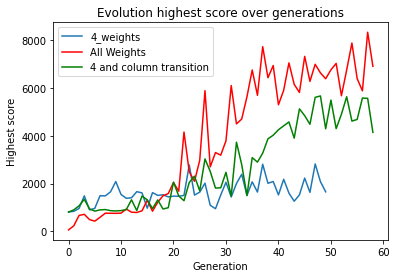

In [34]:
gen_count = 50
#stacked_df = pd.concat([(pd.read_csv(f"./SavedModel/4_first_weights_time_1000_6x4_agents_run_2/model_gen_{i}.csv")) for i in range(1, gen_count+1) ], axis=0)
highest_score_run_1 = []
for i in range(1,gen_count+1):
    df = pd.read_csv(f"../SavedModel/4_first_weights_time_1000_6x4_agents_run_2/model_gen_{i}.csv")
    highest_score_run_1.append(df["score"].max())

highest_score_run_2 = []
for i in range(1, 60):
    df = pd.read_csv(f"../SavedModel/all_weights_time_1000_6x4_agents/model_gen_{i}.csv")
    highest_score_run_2.append(df["score"].max())

highest_score_run_3 = []
for i in range(1, 60):
    df = pd.read_csv(f"../SavedModel/4_and_col_transition_time_1000_6x4_agents/model_gen_{i}.csv")
    highest_score_run_3.append(df["score"].max())

plt.xlabel("Generation")
plt.ylabel("Highest score")
plt.title("Evolution highest score over generations")

plt.plot(highest_score_run_1 , label="4_weights")
plt.plot(highest_score_run_2, 'r', label="All Weights")

plt.plot(highest_score_run_3, 'g', label="4 and column transition")

plt.legend()

As we can see in the graph, the run using only the 4 base heuristics performs better in the 15th first generations. However, it is outperformed by the agent using all heuristics once we pass the 20th generation. At the end the difference in highest score is 5000.

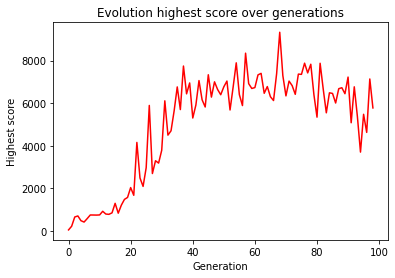

In [28]:
highest_score_run_2 = []
for i in range(1, 100):
    df = pd.read_csv(f"../SavedModel/all_weights_time_1000_6x4_agents/model_gen_{i}.csv")
    highest_score_run_2.append(df["score"].max())

plt.xlabel("Generation")
plt.ylabel("Highest score")
plt.title("Evolution highest score over generations")


plt.plot(highest_score_run_2, 'r',)

We see here that there a peak at the 60th generation that drops after. We should check what happens with again more generations.

# Test Correlation with new data

## All weights

In [29]:
gen_count = 100
stacked_df = pd.concat([(pd.read_csv(f"../SavedModel/all_weights_time_1000_6x4_agents/model_gen_{i}.csv")) for i in range(1, gen_count+1) ], axis=0)
stacked_df
stacked_df.corr()["score"]

weight_holes            -0.012136
weight_height            0.013323
weight_bumpiness         0.011103
weight_line_clear        0.006793
weight_hollow_columns    0.018648
weight_row_transition    0.010865
weight_col_transition    0.022369
weight_pit_count        -0.010928
score                    1.000000
Name: score, dtype: float64

## 4 base Heuristics

In [30]:
gen_count = 50
stacked_df = pd.concat([(pd.read_csv(f"../SavedModel/4_first_weights_time_1000_6x4_agents_run_2/model_gen_{i}.csv")) for i in range(1, gen_count+1) ], axis=0)

stacked_df = stacked_df.iloc[:,[0,1,2,3,9]]
stacked_df
stacked_df.corr()["score"]

weight_holes        -0.024077
weight_height       -0.015694
weight_bumpiness    -0.035683
weight_line_clear    0.035532
score                1.000000
Name: score, dtype: float64

From the correlation matrix, we see that the bumpiness and the line clear seem to be the most important parameters.
Also note that we should : **penalize** holes, height, bumpiness and **reward** line cleared